In [2]:
using NCDatasets
using Plots, ColorSchemes
using DataFrames
using SparseArrays, LinearAlgebra, Statistics

In [ ]:
ds = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/Wi100y_231011_23:28_8P20Z13B5D.nc")

In [4]:
function final_year(vars, ds)
    # 100 ts each day, 1 in 5 recorded (i.e. 20 each day)
    # final year = 366 * 20 = 7320 recorded ts

    final_yr = Vector{Any}()

    for v in vars
        if v != "o"
            append!(final_yr, [ds[v][:, :, end-7319:end]])
        else
            append!(final_yr, [ds[v][:, end-7319:end]])
        end
    end

    return final_yr

end

function get_zc(H)

    dz = 10
    zc = [dz/2 : dz : H - dz/2;] 

    return zc

end

get_zc (generic function with 1 method)

In [5]:
n, p, z, b, d, o = final_year(["n", "p", "z", "b", "d", "o"], ds)

6-element Vector{Any}:
 [0.027521083644712792; 0.02780980871465707; … ; 0.6768924560061848; 0.6768766683109173;;; 0.027540470648903255; 0.0278294861248993; … ; 0.6775562810627432; 0.6775404060338212;;; 0.027559400020547756; 0.027848698283752787; … ; 0.6782195665816123; 0.6782036049504452;;; … ;;; 0.028530627499021546; 0.028830533544433594; … ; 0.7516960086158546; 0.7516728328515572;;; 0.028533959517350643; 0.02883387840059553; … ; 0.7523164007282404; 0.7522931758982365;;; 0.02853723097763239; 0.0288371621494234; … ; 0.7529365558114357; 0.752913282053507]
 [4.170947653643173e-305 4.643377459857892e-305 … 0.5956840735865546 0.0149847148149127; 4.16730870265371e-305 4.642188534130581e-305 … 0.5952755397201361 0.015008128002298109; … ; 2.224023732953112e-305 2.225041928413204e-305 … 8.645974022456656e-18 3.858947654701244e-17; 2.2247871786904451e-305 2.2243624957743042e-305 … 8.537955890475441e-18 3.810736019871875e-17;;; 4.170947653643173e-305 4.643377459857892e-305 … 0.5942755871311939 0

In [ ]:
zc = get_zc(500)

In [ ]:
depth = -zc
data = b[1:50, 5, :]

In [11]:
ts = collect(1:size(data, 2))

7320-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
    ⋮
 7312
 7313
 7314
 7315
 7316
 7317
 7318
 7319
 7320

In [25]:
daily_data = data[:, 1:20:end]
days = collect(1:size(daily_data, 2))

366-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
   ⋮
 358
 359
 360
 361
 362
 363
 364
 365
 366

In [26]:
zz =  Array{Float64}(undef, size(depth, 1), size(daily_data, 2))
# zz_ts = Array{Float64}(undef, size(depth, 1), size(data, 1))

50×366 Matrix{Float64}:
 NaN             NaN             …  NaN             NaN
   2.122e-314      2.122e-314         6.89861e-310    1.1037e-320
 NaN             NaN                NaN             NaN
   9.6e-322        0.0                2.122e-314      9.6e-322
 NaN             NaN                NaN             NaN
   9.09108e-316    8.48798e-314  …    9.6e-322        8.48798e-314
 NaN             NaN                NaN             NaN
   5.98615e-311    2.122e-314         6.36599e-312    2.08e-322
 NaN             NaN                NaN             NaN
   4.24399e-314    9.6e-322           1.784e-321      2.122e-314
   ⋮                             ⋱                    ⋮
   8.48798e-314    5.05247e-311       8.48798e-314    9.6e-322
 NaN             NaN                NaN             NaN
   2.122e-314      2.122e-314         0.0             9.6e-322
 NaN             NaN                NaN             NaN
   9.6e-322        0.0           …    2.122e-314      0.0
 NaN             Na

In [27]:
for i in eachindex(depth)
    for j in eachindex(days)
        zz[i, j] = daily_data[i,j]
    end
end

In [229]:
for i in eachindex(depth)
    for j in eachindex(ts)
        zz_ts[i, j] = data[j][i]
    end
end

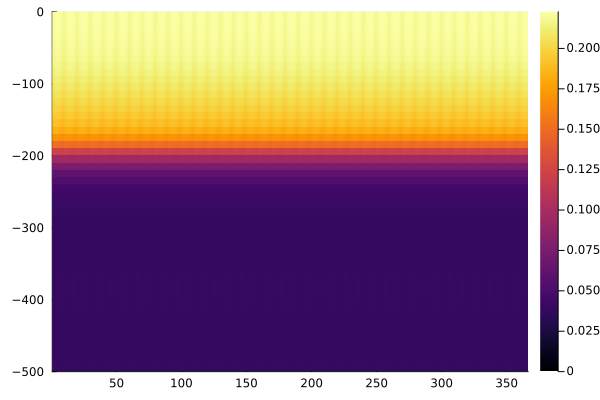

In [29]:
heatmap(days, reverse(depth), reverse(zz), clims=(0, maximum(zz)))

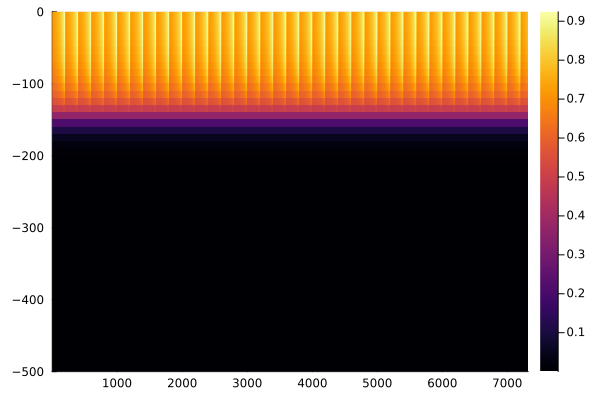

In [230]:
heatmap(ts, reverse(depth), reverse(zz_ts))

In [ ]:
data = collect(eachslice(b[1:50, 9, :], dims=2))
daily_data = data[1:20:end]

In [221]:
zz =  Array{Float64}(undef, size(depth, 1), size(daily_data, 1))
for i in eachindex(depth)
    for j in eachindex(days)
        zz[i, j] = daily_data[j][i]
    end
end

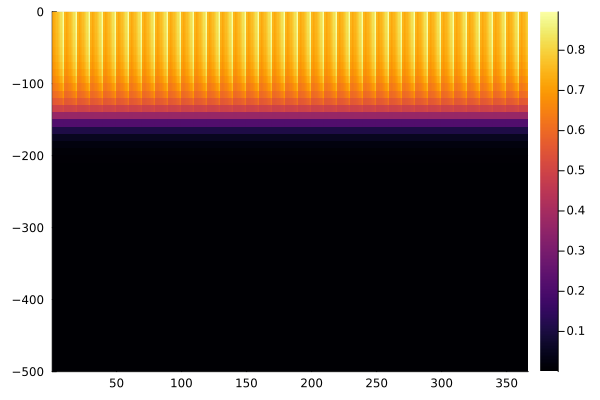

In [222]:
heatmap(days, reverse(depth), reverse(zz))

In [ ]:
data = collect(eachslice(b[1:50, 9, :], dims=2))
daily_data = data[1:20:end]